In [43]:
import pandas as pd
pd.options.display.max_colwidth = 3000

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nihaal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nihaal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
data =pd.read_csv('Amazon_Review.csv')
reviews_text=data['reviews.text']
reviews_title=data['reviews.title']
reviews_username =data['reviews.username']
df = pd.DataFrame(data)

In [45]:
del data['id']
del data['asins']
del data['brand']
del data['categories']
del data['primaryCategories']
del data['imageURLs']
del data['reviews.dateSeen']
del data['reviews.doRecommend']
del data['keys']




In [46]:
df = pd.DataFrame(data)

In [47]:

df.head()

,dateAdded,dateUpdated,name,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,NaN,0,3,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D20,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D20",I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,Too small,llyyue,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D37,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D38,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D35,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D36,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D33,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D34,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D31,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D30,https://www.target.com/p/amazon-kindle-e-reader-6-wifi-8th-generation-2016/-/A-51467832,https://reviews.bestbuy.com/3545/5442403/reviews.htm%252525253Fformat%252525253Dembedded,https://www.newegg.com/Product/Product.aspx%253FItem%253D9SIAFVD7FK6707,https://www.bhphotovideo.com/c/product/1264068-REG/kindle_b00zv9pxp2_kindle_6_ereader_special.html,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D44,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D45,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D42,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D43,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D40,https://www.upccodesearch.com/upc/848719083774,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D41,http://www.ebay.com/itm/NEW-SEALED-AMAZON-KINDLE-E-READER-BLACK-6-GLARE-FREE-WI-FI-8TH-GENERATION-/252974470193%25252525253Fhash%25252525253Ditem3ae6741431%25252525253Ag%25252525253A9xEAAOSwEHpZNH8N,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D6,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%252525..."
1,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon

In [48]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
one_review=df.iloc[3]['reviews.text']
one_review

"I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle (the first being the old Keyboard model, which I put down because I fell out of love with the keyboard. Lol) and it most likely won't be my last."

In [50]:
cleanreviwe = ' '.join(word for word in one_review.split() if word not in stp_words)
cleanreviwe

'I 100 happy purchase. I caught sale really good price. I normally real book person, I 1 year old loves ripping pages. The Kindle prevents that, extremely portable (it fits better purse giant book), I loaded lots books. I finish one start another, without go store. It serves needs. I picked one Paperwhite price unbeatable difference I could see one backlit. A simple book light Dollar tree solves issue. This second Kindle (the first old Keyboard model, I put I fell love keyboard. Lol) likely last.'

In [51]:
def reviewsCleaning(reviews_text):
    cleanreviwe = ' '.join(word for word in reviews_text.split() if word not in stp_words)
    return cleanreviwe


In [52]:
df['cleanReviews'] = df['reviews.text'].apply(reviewsCleaning) 
df.head()

,dateAdded,dateUpdated,name,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,cleanReviews
0,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,NaN,0,3,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D20,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D20",I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,Too small,llyyue,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D37,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D38,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D35,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D36,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D33,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D34,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D31,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D30,https://www.target.com/p/amazon-kindle-e-reader-6-wifi-8th-generation-2016/-/A-51467832,https://reviews.bestbuy.com/3545/5442403/reviews.htm%252525253Fformat%252525253Dembedded,https://www.newegg.com/Product/Product.aspx%253FItem%253D9SIAFVD7FK6707,https://www.bhphotovideo.com/c/product/1264068-REG/kindle_b00zv9pxp2_kindle_6_ereader_special.html,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D44,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D45,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D42,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D43,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D40,https://www.upccodesearch.com/upc/848719083774,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D41,http://www.ebay.com/itm/NEW-SEALED-AMAZON-KINDLE-E-READER-BLACK-6-GLARE-FREE-WI-FI-8TH-GENERATION-/252974470193%25252525253Fhash%25252525253Ditem3ae6741431%25252525253Ag%25252525253A9xEAAOSwEHpZNH8N,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D6,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%252525...",I thought would big small paper turn l

In [53]:
from textblob import TextBlob
from wordcloud import WordCloud



def calPolarity(reviews_text):
    return TextBlob(reviews_text).sentiment.polarity

def calSubjectivity(reviews_text):
    return TextBlob(reviews_text).sentiment.subjectivity

def segmentation(reviews_text):
    if reviews_text > 0.5 and reviews_text <= 1:
        return "Excellent"
    if reviews_text > 0.0 and reviews_text <= 0.5:
        return "Good"
    if reviews_text == 0:
        return "Satisfactory"
    if reviews_text > -0.5 and reviews_text < 0.:
        return "Can be better"
    else:
        return "Needs improvement"



In [54]:
df['cleanReviews'] = df['reviews.text'].apply(reviewsCleaning)
df['tPolarity'] = df['cleanReviews'].apply(calPolarity)
df['tSubjectivity'] = df['cleanReviews'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,dateAdded,dateUpdated,name,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,cleanReviews,tPolarity,tSubjectivity,segmentation
0,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,NaN,0,3,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D20,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D20",I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,Too small,llyyue,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D37,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D38,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D35,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D36,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D33,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D34,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D31,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D30,https://www.target.com/p/amazon-kindle-e-reader-6-wifi-8th-generation-2016/-/A-51467832,https://reviews.bestbuy.com/3545/5442403/reviews.htm%252525253Fformat%252525253Dembedded,https://www.newegg.com/Product/Product.aspx%253FItem%253D9SIAFVD7FK6707,https://www.bhphotovideo.com/c/product/1264068-REG/kindle_b00zv9pxp2_kindle_6_ereader_special.html,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D44,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D45,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D42,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D43,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D40,https://www.upccodesearch.com/upc/848719083774,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D41,http://www.ebay.com/itm/NEW-SEALED-AMAZON-KINDLE-E-READER-BLACK-6-GLARE-FREE-WI-FI-8TH-GENERATION-/252974470193%25252525253Fhash%25252525253Ditem3ae6741431%25252525253Ag%25252525253A9xEAAOSwEHpZNH8N,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D6,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%252525...",I

In [55]:
df.head()

,dateAdded,dateUpdated,name,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,cleanReviews,tPolarity,tSubjectivity,segmentation
0,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",Amazon,B00ZV9PXP2,2017-09-03T00:00:00.000Z,NaN,NaN,0,3,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D20,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D20",I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,Too small,llyyue,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D37,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D38,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D35,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D36,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D33,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D34,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D31,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D30,https://www.target.com/p/amazon-kindle-e-reader-6-wifi-8th-generation-2016/-/A-51467832,https://reviews.bestbuy.com/3545/5442403/reviews.htm%252525253Fformat%252525253Dembedded,https://www.newegg.com/Product/Product.aspx%253FItem%253D9SIAFVD7FK6707,https://www.bhphotovideo.com/c/product/1264068-REG/kindle_b00zv9pxp2_kindle_6_ereader_special.html,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D44,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D45,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D42,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D43,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D40,https://www.upccodesearch.com/upc/848719083774,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D41,http://www.ebay.com/itm/NEW-SEALED-AMAZON-KINDLE-E-READER-BLACK-6-GLARE-FREE-WI-FI-8TH-GENERATION-/252974470193%25252525253Fhash%25252525253Ditem3ae6741431%25252525253Ag%25252525253A9xEAAOSwEHpZNH8N,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D6,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%252525...",I

In [56]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
Can be better,196
Excellent,1407
Good,3031
Needs improvement,24
Satisfactory,342


In [57]:
# 3 most positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,dateAdded,dateUpdated,name,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,cleanReviews,tPolarity,tSubjectivity,segmentation
2239,2017-01-11T06:58:33Z,2018-09-21T18:45:21Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",Amazon,53-004755,2016-11-26T00:00:00.000Z,NaN,NaN,0,5,"http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=157,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=181",Works great ! Geating this one for my grandson for Christmas! He plays with his sisters now ! Well protected when they drop them ! Great learning experience !,"Granddaughter has one , loves it !",Dave,"http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=132,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=133,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=134,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=135,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=130,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=131,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=136,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=137,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=138,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=139,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=13,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=11,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=12,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=10,http://www.toysrus.com/product/index.jsp?productId=102263096&cp=2255956.3053760.88771286.79975076&parentPage=family,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=121,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=122,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=123,http://www.bestbuy.com/site/amazon-fire-kids-edition-16gb-5th-gen-2015-release-blue/5026000.p?skuId=5026000,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=124,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=120,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=129,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=125,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=126,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=127,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=128,http://www.toysrus.com/product/index.jsp?productId=102263096&cp=3137242.49102796&parentPage=family,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=110,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=111,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=112,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=113,https://m.toysrus.com/product/index.jsp?productId=102263096&cp=2255956.3053760.13041262.13070057&parentPage=family,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=118,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=119,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=114,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=115,http://reviews.bestbuy...",Works great ! Geating one grandson Christmas! He plays sisters ! Well protected drop ! Great learning experience !,1.0,0.75,Excellent
1212,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Buil

In [58]:
# 3 most NEGItive
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,dateAdded,dateUpdated,name,manufacturer,manufacturerNumber,reviews.date,reviews.dateAdded,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,cleanReviews,tPolarity,tSubjectivity,segmentation
1698,2017-01-11T06:58:33Z,2018-09-21T18:45:21Z,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",Amazon,53-004755,2016-10-28T00:00:00.000Z,NaN,NaN,0,5,"http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=169,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=193",My son is obsessed with his kids kindle!! A must have so they stay off your phone !,Fun for kids,Drbelvue,"http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=132,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=133,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=134,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=135,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=130,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=131,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=136,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=137,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=138,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=139,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=13,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=11,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=12,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=10,http://www.toysrus.com/product/index.jsp?productId=102263096&cp=2255956.3053760.88771286.79975076&parentPage=family,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=121,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=122,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=123,http://www.bestbuy.com/site/amazon-fire-kids-edition-16gb-5th-gen-2015-release-blue/5026000.p?skuId=5026000,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=124,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=120,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=129,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=125,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=126,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=127,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=128,http://www.toysrus.com/product/index.jsp?productId=102263096&cp=3137242.49102796&parentPage=family,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=110,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=111,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=112,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=113,https://m.toysrus.com/product/index.jsp?productId=102263096&cp=2255956.3053760.13041262.13070057&parentPage=family,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=118,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=119,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=114,http://reviews.bestbuy.com/3545/5026000/reviews.htm?format=embedded&page=115,http://reviews.bestbuy...",My son obsessed kids kindle!! A must stay phone !,-0.976562,1.00,Needs improvement
3672,2017-03-06T14:59:43Z,2018-02-13T21:53:06Z,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,53-004484,2017-04-15T00:00:00.000Z,2017-05-21T05:55:21Z,NaN,0,5,"http://r

In [59]:
#anlyng part

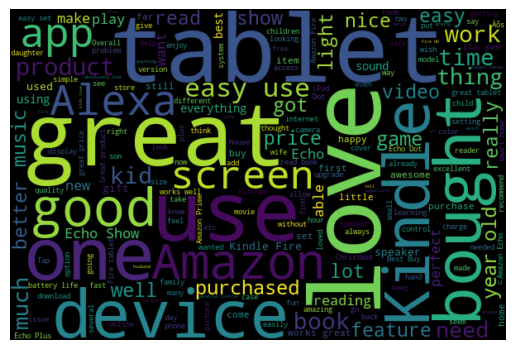

In [60]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanReviews'])

wordCloud = WordCloud(width=600, height=400, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

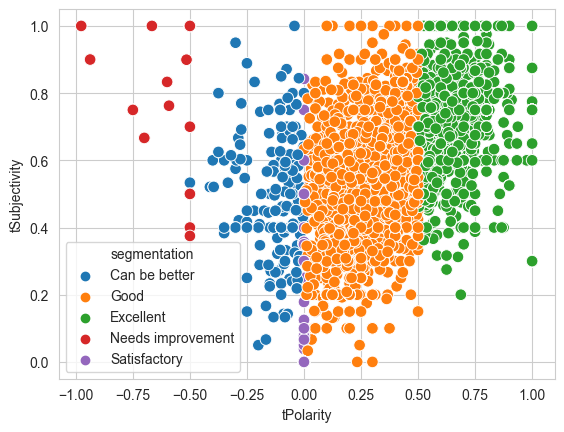

In [61]:
import seaborn as sns


sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=70,hue='segmentation')


c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Nihaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='segmentation', ylabel='count'>

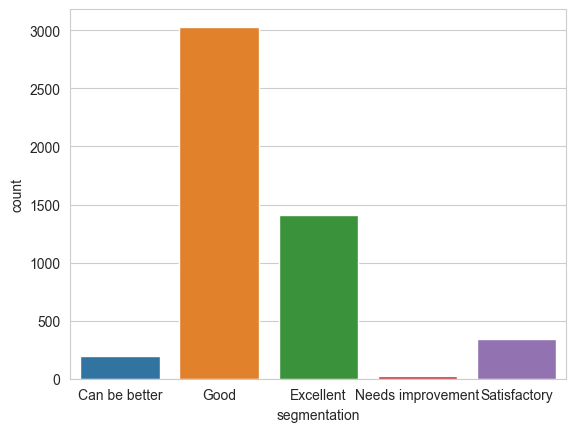

In [62]:
sns.countplot(data=df,x='segmentation')

In [63]:
excellent = round(len(df[df.segmentation == 'Excellent'])/len(df)*100,1)
satisfactory = round(len(df[df.segmentation == 'Satisfactory'])/len(df)*100,1)
good = round(len(df[df.segmentation == 'Good'])/len(df)*100,1)
improvement = round(len(df[df.segmentation == 'Needs improvement'])/len(df)*100,1)
better = round(len(df[df.segmentation == 'Can be better'])/len(df)*100,1)

responses = [excellent,satisfactory,good,improvement,better]
responses

response = {'Response': ['Excellent', 'Satisfactory', 'Good', 'Needs improvement', 'Can be better'], 'Percentage':[excellent,satisfactory,good,improvement,better]}
pd.DataFrame(response)

,Response,Percentage
0,Excellent,28.1
1,Satisfactory,6.8
2,Good,60.6
3,Needs improvement,0.5
4,Can be better,3.9
